In [1]:
import requests

url = "https://alternative.me/api/crypto/fear-and-greed-index/history"
payload = {
    "days": 100000
}

response = requests.post(url, json=payload)

print(response.json())


{'data': {'datasets': [{'backgroundColor': '#ccc', 'borderColor': '#ccc', 'data': [30, 15, 40, 24, 11, 8, 36, 30, 44, 54, 31, 42, 35, 55, 71, 67, 74, 63, 67, 74, 54, 44, 39, 31, 33, 37, 44, 41, 38, 47, 56, 44, 55, 59, 37, 39, 37, 39, 40, 41, 41, 40, 32, 33, 31, 29, 29, 37, 36, 36, 28, 32, 30, 31, 24, 24, 18, 12, 16, 16, 11, 22, 22, 17, 19, 20, 17, 21, 18, 20, 18, 23, 26, 24, 25, 26, 32, 31, 28, 29, 64, 47, 55, 54, 61, 59, 56, 52, 55, 56, 63, 67, 56, 62, 53, 63, 41, 44, 40, 40, 40, 32, 31, 37, 31, 32, 41, 30, 26, 27, 25, 23, 19, 22, 16, 38, 25, 24, 27, 40, 41, 26, 42, 38, 40, 39, 24, 15, 19, 19, 17, 26, 22, 23, 27, 32, 34, 37, 28, 17, 15, 16, 21, 18, 20, 16, 22, 27, 27, 31, 33, 37, 34, 34, 38, 39, 37, 29, 33, 29, 29, 32, 36, 39, 42, 44, 47, 43, 46, 44, 49, 54, 53, 47, 54, 54, 53, 48, 39, 39, 36, 31, 23, 25, 25, 23, 19, 21, 18, 18, 21, 16, 18, 21, 19, 24, 27, 26, 19, 21, 18, 19, 22, 19, 18, 19, 19, 22, 17, 21, 18, 19, 26, 17, 14, 17, 18, 13, 15, 18, 14, 20, 23, 24, 28, 25, 21, 24, 24, 31

In [13]:
response.json()['data']['datasets'][0]['data']

[30,
 15,
 40,
 24,
 11,
 8,
 36,
 30,
 44,
 54,
 31,
 42,
 35,
 55,
 71,
 67,
 74,
 63,
 67,
 74,
 54,
 44,
 39,
 31,
 33,
 37,
 44,
 41,
 38,
 47,
 56,
 44,
 55,
 59,
 37,
 39,
 37,
 39,
 40,
 41,
 41,
 40,
 32,
 33,
 31,
 29,
 29,
 37,
 36,
 36,
 28,
 32,
 30,
 31,
 24,
 24,
 18,
 12,
 16,
 16,
 11,
 22,
 22,
 17,
 19,
 20,
 17,
 21,
 18,
 20,
 18,
 23,
 26,
 24,
 25,
 26,
 32,
 31,
 28,
 29,
 64,
 47,
 55,
 54,
 61,
 59,
 56,
 52,
 55,
 56,
 63,
 67,
 56,
 62,
 53,
 63,
 41,
 44,
 40,
 40,
 40,
 32,
 31,
 37,
 31,
 32,
 41,
 30,
 26,
 27,
 25,
 23,
 19,
 22,
 16,
 38,
 25,
 24,
 27,
 40,
 41,
 26,
 42,
 38,
 40,
 39,
 24,
 15,
 19,
 19,
 17,
 26,
 22,
 23,
 27,
 32,
 34,
 37,
 28,
 17,
 15,
 16,
 21,
 18,
 20,
 16,
 22,
 27,
 27,
 31,
 33,
 37,
 34,
 34,
 38,
 39,
 37,
 29,
 33,
 29,
 29,
 32,
 36,
 39,
 42,
 44,
 47,
 43,
 46,
 44,
 49,
 54,
 53,
 47,
 54,
 54,
 53,
 48,
 39,
 39,
 36,
 31,
 23,
 25,
 25,
 23,
 19,
 21,
 18,
 18,
 21,
 16,
 18,
 21,
 19,
 24,
 27,
 26,
 19,
 21,
 

<Axes: xlabel='Date'>

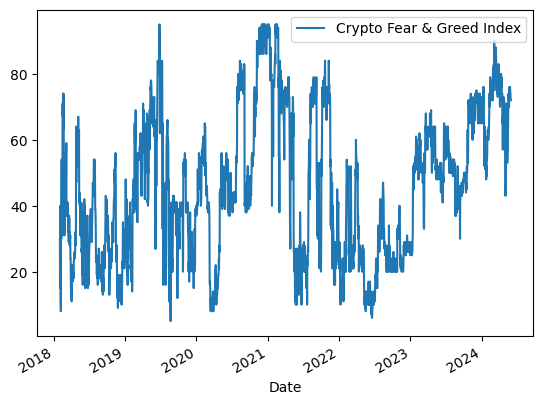

In [34]:
import pandas as pd
dates = response.json()['data']['labels']
values = response.json()['data']['datasets'][0]['data']

# Creating DataFrame
fear_and_greed = pd.DataFrame({
    'Date': dates,
    'Crypto Fear & Greed Index': values
})

fear_and_greed['Date'] = pd.to_datetime(fear_and_greed.Date)

fear_and_greed.set_index('Date').plot()

In [50]:


import requests
def fetch_ethereum_daily_prices(api_key):
    url = "https://min-api.cryptocompare.com/data/v2/histoday"
    parameters = {
        'fsym': 'ETH',  # From Symbol: Ethereum
        'tsym': 'USD',  # To Symbol: USD
        'limit': 2000,    # Number of data points (days)
        'api_key': api_key
    }
    response = requests.get(url, params=parameters)
    data = response.json()
    if data['Response'] == 'Success':
        return data['Data']['Data']
    else:
        return "An error occurred: " + data['Message']


api_key = '038ebb6388bd47ca996f19135a24ec40b612f901821e34ab030d08b0f919f49e'
eth_prices_req = fetch_ethereum_daily_prices(api_key)

ConnectionError: HTTPSConnectionPool(host='min-api.cryptocompare.com', port=443): Max retries exceeded with url: /data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=038ebb6388bd47ca996f19135a24ec40b612f901821e34ab030d08b0f919f49e (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x138097bc0>: Failed to resolve 'min-api.cryptocompare.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [48]:
from datetime import datetime

eth_prices = pd.DataFrame(eth_prices_req)

dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in eth_prices.time]
eth_prices["dates"] = dates
eth_prices["Ethereum_Price"] = eth_prices.close
eth_prices["dates"] = pd.to_datetime(eth_prices.dates)

AttributeError: 'DataFrame' object has no attribute 'time'

In [52]:
# eth_prices[['dates', 'Ethereum_Price']]
# import pandas as pd
dates = response.json()['data']['labels']
values = response.json()['data']['datasets'][0]['data']

# Creating DataFrame
fear_and_greed = pd.DataFrame({
    'Date': dates,
    'Crypto Fear & Greed Index': values
})

fear_and_greed['Date'] = pd.to_datetime(fear_and_greed.Date)

fear_and_greed.set_index('Date').plot()

KeyError: 'data'

In [53]:
fear_and_greed

,Date,Crypto Fear & Greed Index
0,2018-02-01,30
1,2018-02-02,15
2,2018-02-03,40
3,2018-02-04,24
4,2018-02-05,11
...,...,...
2302,2024-05-25,76
2303,2024-05-26,75
2304,2024-05-27,74
2305,2024-05-28,72


In [55]:
# import pandas as pd

# # Assuming eth_prices DataFrame is already created
# eth_prices['Date'] = pd.to_datetime(eth_prices['dates'])
# eth_prices = eth_prices[['Date', 'Ethereum_Price']]

# Merge the DataFrames on the Date column
merged_df = pd.merge(eth_prices, fear_and_greed, on='Date')
# Calculate the price change percentage
merged_df['Price_Change'] = merged_df['Ethereum_Price'].pct_change()

# Create the target variable
def classify_movement(change):
    if pd.isna(change):
        return 'flat'
    elif change > 0.01:
        return 'up'
    elif change < -0.01:
        return 'down'
    else:
        return 'flat'

merged_df['Price_Movement'] = merged_df['Price_Change'].shift(-1).apply(classify_movement)
# Drop rows with NaN values which occur due to the shift operation
merged_df.dropna(subset=['Price_Movement'], inplace=True)

# Prepare features and labels
X = merged_df[['Crypto Fear & Greed Index']]
y = merged_df['Price_Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


NameError: name 'LogisticRegression' is not defined

In [146]:
merged_df

,Date,Ethereum_Price,Crypto Fear & Greed Index,Price_Change,Crypto Fear & Greed Index Yesterday
0,2018-12-07,93.61,11,-0.020617,NaN
1,2018-12-08,91.68,11,0.030650,11.0
2,2018-12-09,94.49,14,-0.039369,11.0
3,2018-12-10,90.77,19,-0.026991,14.0
4,2018-12-11,88.32,15,0.023324,19.0
...,...,...,...,...,...
1996,2024-05-25,3749.23,76,0.020033,74.0
1997,2024-05-26,3824.34,75,0.017498,76.0
1998,2024-05-27,3891.26,74,-0.013073,75.0
1999,2024-05-28,3840.39,72,-0.006301,74.0


<Axes: xlabel='Date'>

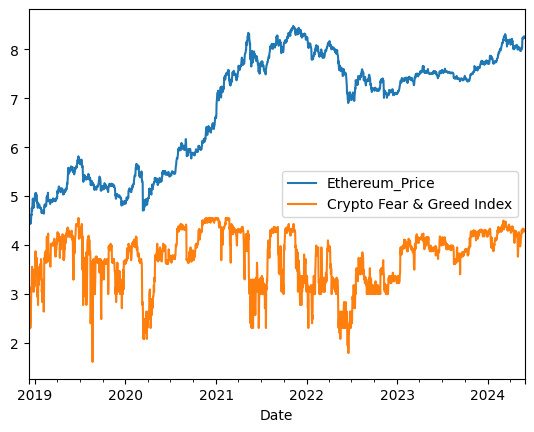

In [106]:
np.log(merged_df.set_index('Date')[['Ethereum_Price', 'Crypto Fear & Greed Index']]).plot()

In [110]:
merged_df.columns

Index(['Date', 'Ethereum_Price', 'Crypto Fear & Greed Index', 'Price_Change',
       'Price_Movement'],
      dtype='object')

In [114]:
print(np.log(merged_df.set_index('Date')[['Ethereum_Price', 'Crypto Fear & Greed Index']]).corr())
print(np.log(merged_df.set_index('Date')[['Crypto Fear & Greed Index', 'Price_Change']]).corr())

                           Ethereum_Price  Crypto Fear & Greed Index
Ethereum_Price                   1.000000                   0.129115
Crypto Fear & Greed Index        0.129115                   1.000000
                           Crypto Fear & Greed Index  Price_Change
Crypto Fear & Greed Index                   1.000000     -0.032092
Price_Change                               -0.032092      1.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [43]:
merged_df

,Unnamed: 0,Date,Ethereum_Price,Crypto Fear & Greed Index,Price_Change,Price_Movement
0,0,2018-12-07,93.61,11,-0.020617,up
1,1,2018-12-08,91.68,11,0.030650,down
2,2,2018-12-09,94.49,14,-0.039369,down
3,3,2018-12-10,90.77,19,-0.026991,up
4,4,2018-12-11,88.32,15,0.023324,down
...,...,...,...,...,...,...
1949,1949,2024-04-08,3694.70,76,-0.051390,up
1950,1950,2024-04-09,3504.83,80,0.011621,down
1951,1951,2024-04-10,3545.56,78,-0.011945,down
1952,1952,2024-04-11,3503.21,76,-0.075385,down


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



merged_df = pd.merge(eth_prices, fear_and_greed, on='Date')
merged_df['Price_Change'] = merged_df['Ethereum_Price'].pct_change().shift(-1)

# Create the target variable
def classify_movement(change):
    if pd.isna(change):
        return 'flat'
    elif change > 0.01:
        return 'up'
    elif change < -0.01:
        return 'down'
    else:
        return 'flat'

merged_df['Price_Movement'] = merged_df['Price_Change'].shift(-1).apply(classify_movement)

# Drop rows with NaN values which occur due to the shift operation
merged_df.dropna(inplace=True)

# Prepare features and labels
X = merged_df[['Crypto Fear & Greed Index']]
y = merged_df['Price_Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
merged_df

NameError: name 'eth_prices' is not defined

In [188]:
merged_df.to_csv('Price Fear and Greed.csv')

In [1]:
import pandas as pd 
merged_df = pd.read_csv('Price Fear and Greed.csv')

In [5]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_df = merged_df.resample('W', on='Date')[['Ethereum_Price', 'Crypto Fear & Greed Index']].last().reset_index()
merged_df

,Date,Ethereum_Price,Crypto Fear & Greed Index
0,2018-12-09,94.49,14
1,2018-12-16,85.39,13
2,2018-12-23,131.45,31
3,2018-12-30,141.04,23
4,2019-01-06,158.29,31
...,...,...,...
282,2024-05-05,3137.09,69
283,2024-05-12,2927.97,56
284,2024-05-19,3070.68,72
285,2024-05-26,3824.34,75


<Axes: xlabel='Date'>

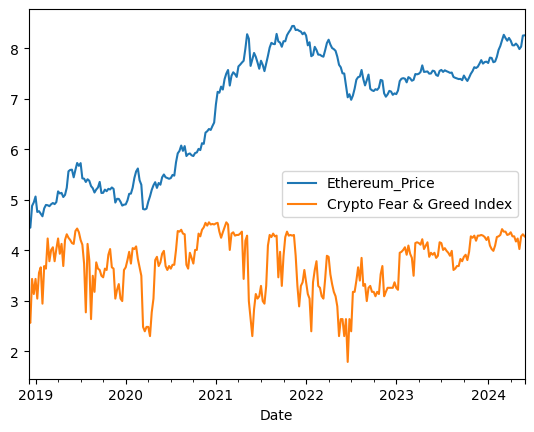

In [6]:
import numpy as np

np.log(merged_df.set_index('Date')[['Ethereum_Price', 'Crypto Fear & Greed Index']]).plot()

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 122, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 218, number of used features: 1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

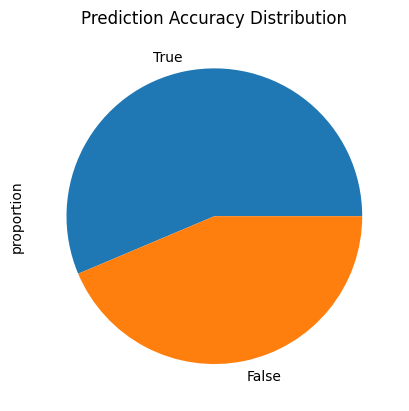

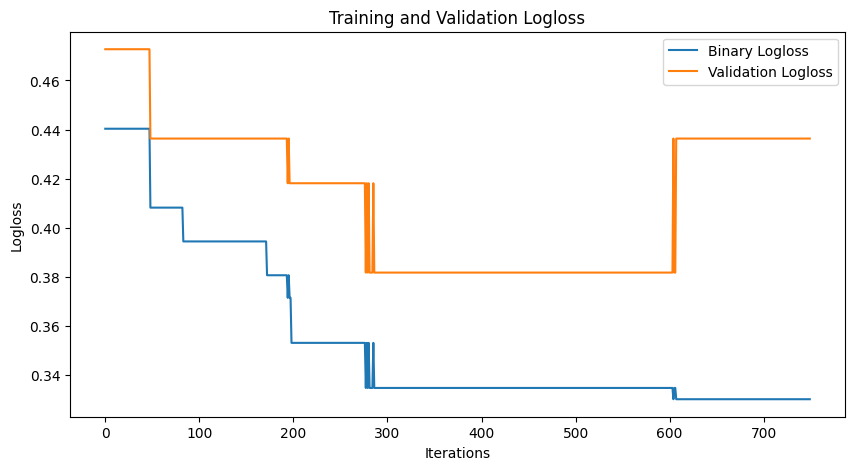

In [23]:

# Create the target variable
def classify_movement(change):
    
    if change > 0:
        return 'up'
    elif change < 0:
        return 'down'
    
    
merged_df['Price_Change'] = merged_df['Ethereum_Price'].pct_change().shift(-1)


merged_df['Price_Movement'] = merged_df['Price_Change'].shift(-1).apply(classify_movement)

# Drop rows with NaN values which occur due to the shift operation
merged_df.dropna(inplace=True)

# Prepare features and labels
X = merged_df[['Crypto Fear & Greed Index']]
y = merged_df['Price_Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report



# Convert labels to numeric values for LightGBM
label_mapping = {'up': 1,'down': 0}
y = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize three LightGBM models
model1 = lgb.LGBMClassifier(
    n_estimators=750,         # Larger number of iterations
    learning_rate=0.01,        # Smaller learning rate
    subsample=0.8,             # Subsample ratio of the training instance
    lambda_l1=0.1,             # L1 regularization
    lambda_l2=0.1,             # L2 regularization
    min_split_gain=0.01        # Minimum loss reduction required to make a further partition
)
evals_result = {}

# Train the model with evaluation set
model1.fit(X_train, y_train,
           eval_set=[(X_train, y_train), (X_test, y_test)],
           eval_names=['train', 'valid'],
           eval_metric='binary_error',
           callbacks=[lgb.record_evaluation(evals_result)])

# Predict probabilities
probs1 = model1.predict_proba(X_test)

# Determine the highest predicted category
y_pred = probs1.argmax(axis=1)

# Convert numeric predictions back to labels
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_pred_labels = pd.Series(y_pred).map(inverse_label_mapping)
y_test_labels = y_test.map(inverse_label_mapping)

# Evaluate the model
print(classification_report(y_test_labels, y_pred_labels))
print(pd.Series((y_test == y_pred)).value_counts(normalize=True))
pd.Series((y_test == y_pred)).value_counts(normalize=True).plot(kind='pie')
plt.title('Prediction Accuracy Distribution')
plt.show()

# Plot training curves
train_logloss = evals_result['train']['binary_error']
valid_logloss = evals_result['valid']['binary_error']

plt.figure(figsize=(10, 5))
plt.plot(train_logloss, label='Binary Logloss')
plt.plot(valid_logloss, label='Validation Logloss')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.title('Training and Validation Logloss')
plt.legend()
plt.show()

<Axes: >

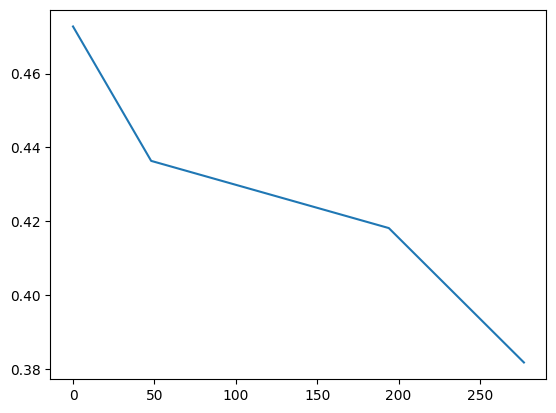

In [24]:
pd.Series(evals_result['valid']['binary_error']).drop_duplicates().plot()

In [72]:
y_pred_labels.value_counts()

up      49
down     7
Name: count, dtype: int64

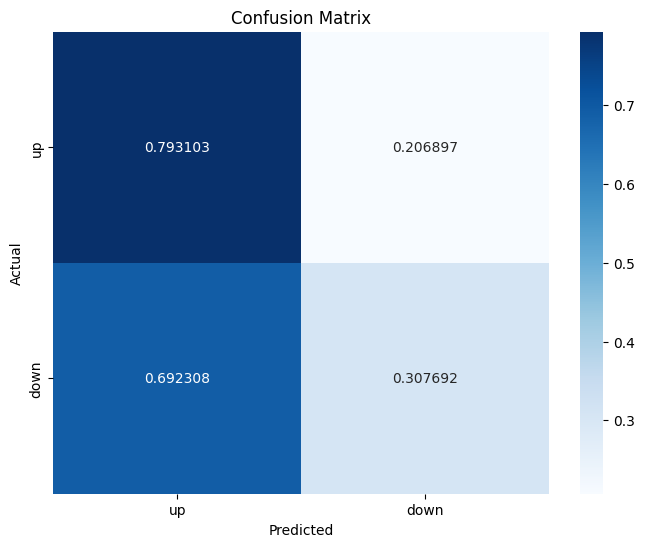

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=['up', 'down'], normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='f', cmap='Blues', xticklabels=['up', 'down'], yticklabels=['up', 'down'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


array([[0.56953642, 0.16556291, 0.26490066],
       [0.48181818, 0.30909091, 0.20909091],
       [0.37857143, 0.27142857, 0.35      ]])

In [ ]:
conf_matrix

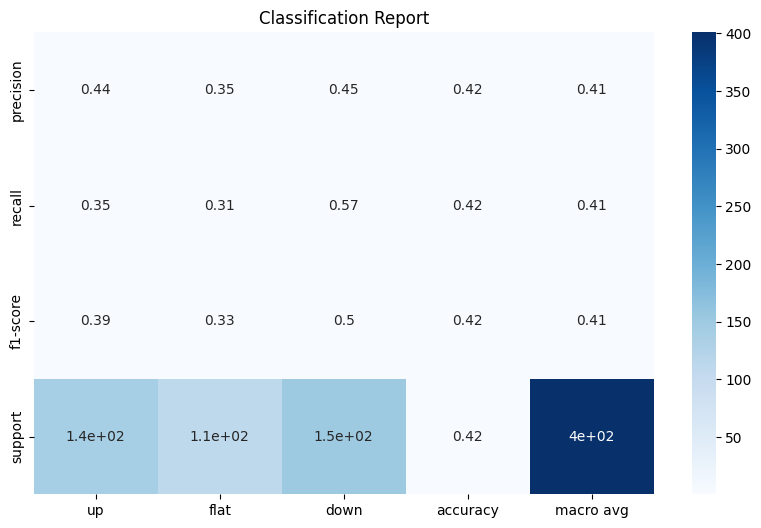

In [75]:
from sklearn.metrics import classification_report
import numpy as np

# Classification report as a heatmap
report = classification_report(y_test_labels, y_pred_labels, output_dict=True, target_names=['up', 'flat', 'down'])

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


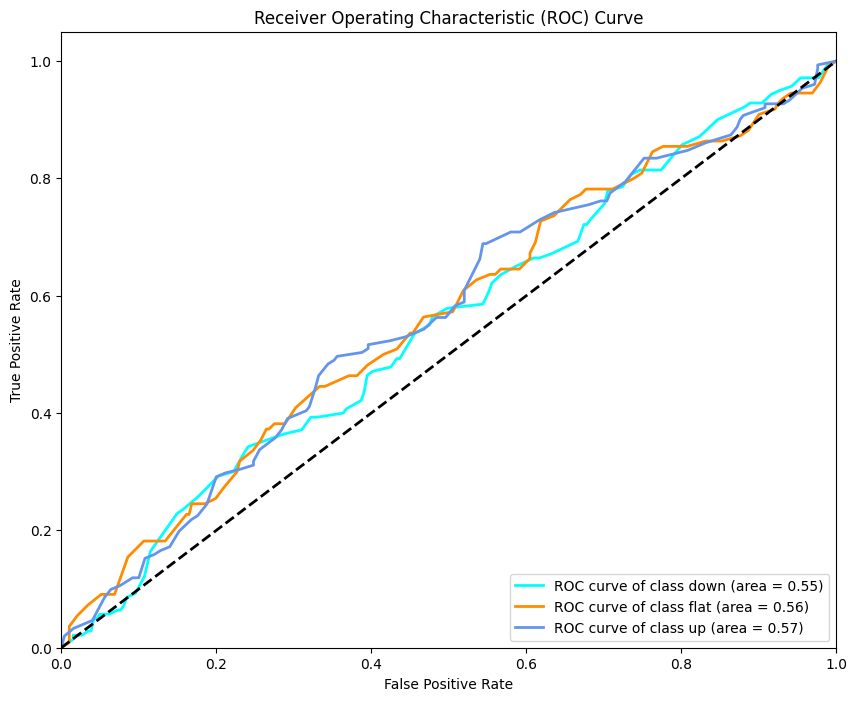

In [76]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], average_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(inverse_label_mapping[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


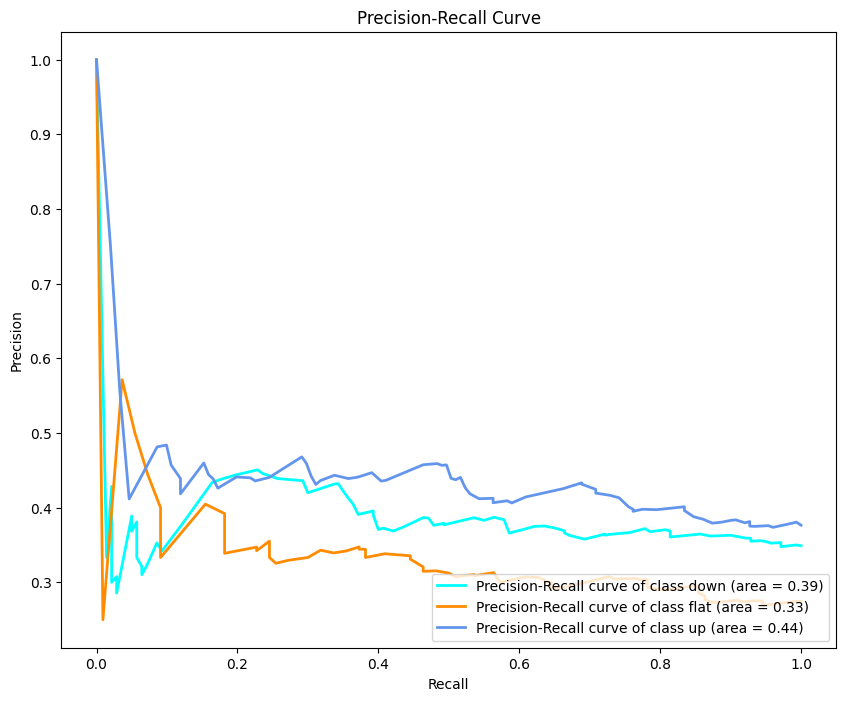

In [77]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve and PR area for each class
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], average_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot all Precision-Recall curves
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(inverse_label_mapping[i], pr_auc[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()
